In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [33]:
df = load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
X = pd.DataFrame(df.data)
y = pd.DataFrame(df.target)

df = pd.concat([X, y], axis=1)
df.columns = ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)', 
  'Species']
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}, inplace=True)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


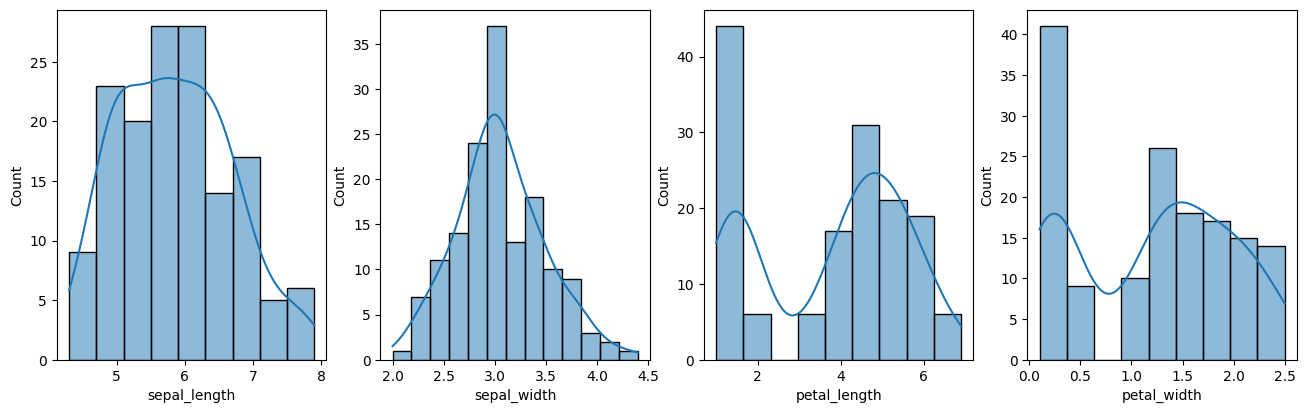

In [37]:
columns = df.iloc[:, :-1].columns
fig = plt.figure(figsize=(16,10))
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=col, kde=True)


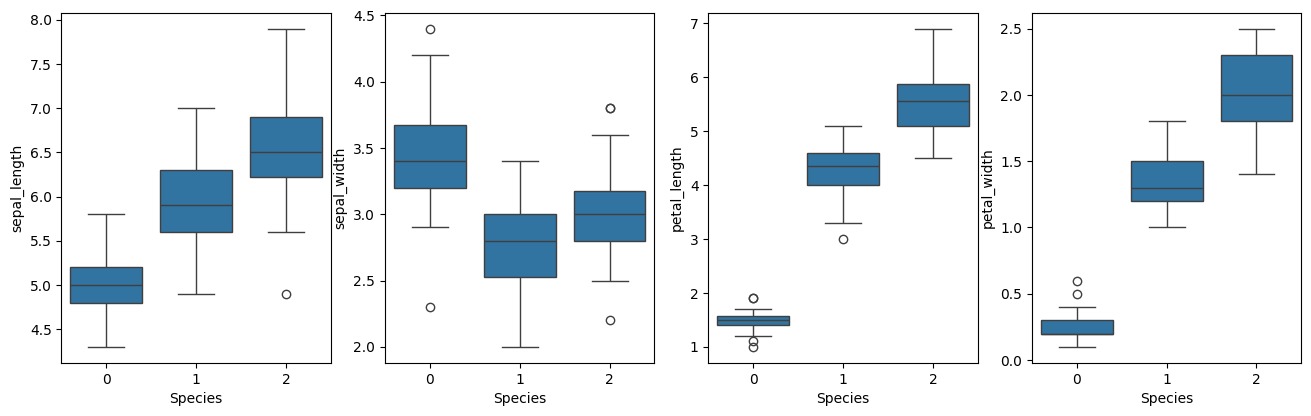

In [38]:
columns = df.iloc[:, :-1].columns
fig = plt.figure(figsize=(16,10))
for i in range(len(columns)):
    col = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df, x='Species', y=col)


In [39]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.index

Index([ 81, 133, 137,  75, 109,  96, 105,  66,   0, 122,
       ...
        87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
      dtype='int64', length=105)

In [40]:
X_test.index

Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,  32, 142,  85,
        86,  16,  10],
      dtype='int64')

In [41]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
gnb.class_count_

array([31., 37., 37.])

In [43]:
gnb.classes_

array([0, 1, 2])

In [44]:
gnb.epsilon_

2.934842630385488e-09

In [46]:
y_pred_proba = gnb.predict_proba(X_test)
y_pred_proba

array([[4.15880005e-088, 9.95527834e-001, 4.47216606e-003],
       [1.00000000e+000, 1.31031235e-013, 2.21772205e-020],
       [9.83170191e-285, 2.70138564e-012, 1.00000000e+000],
       [9.54745274e-092, 9.74861431e-001, 2.51385686e-002],
       [1.08679560e-103, 8.31910700e-001, 1.68089300e-001],
       [1.00000000e+000, 6.77693844e-013, 7.14891338e-021],
       [2.79985841e-051, 9.99963925e-001, 3.60749274e-005],
       [3.47130487e-172, 4.26099520e-007, 9.99999574e-001],
       [8.87424368e-094, 9.93578115e-001, 6.42188515e-003],
       [1.01525828e-057, 9.99952885e-001, 4.71152410e-005],
       [3.89708229e-148, 2.58773323e-004, 9.99741227e-001],
       [1.00000000e+000, 1.41103765e-016, 9.36331484e-025],
       [1.00000000e+000, 2.50761563e-016, 5.99383407e-024],
       [1.00000000e+000, 3.02382725e-016, 3.69654979e-024],
       [1.00000000e+000, 2.31820777e-016, 1.18856457e-023],
       [6.09343428e-105, 4.23901472e-001, 5.76098528e-001],
       [8.42661111e-199, 2.69249362e-007

In [58]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [59]:
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [60]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [61]:
print(confusion_matrix(y_test, y_pred).ravel())

[19  0  0  0 12  1  0  0 13]


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

